In [1]:
from data.norec_sentence.dataloader import load_full_dataset
import pandas as pd

In [2]:
data = load_full_dataset()

train = data['train']
val = data['dev']
test = data['test']

combined_data = pd.concat([train, val, test]).reset_index(drop=True)

print(f"Train: {train.shape}")
print(f"Val: {val.shape}")
print(f"Test: {test.shape}")
print(f"Combined: {combined_data.shape}")

Train: (7973, 2)
Val: (1411, 2)
Test: (1181, 2)
Combined: (10565, 2)


In [3]:
combined_data.head()

,text,label
0,Søk i restaurantbasen og se de sist anmeldte r...,1
1,Mye å spare her - med andre ord .,2
2,Først fikk begge en espressokopp med strandkra...,2
3,"Det hjelper jo lite om den kjører runden sin ,...",1
4,"Kyllingen var nydelig smaksrik og krydret , pø...",2


<AxesSubplot:>

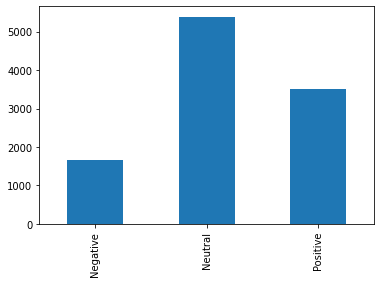

In [4]:
combined_data["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:>

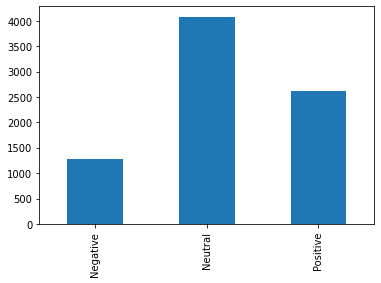

In [5]:
train["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

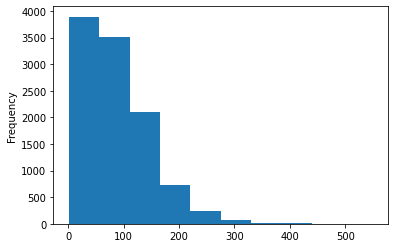

In [6]:
combined_data["text"].str.len().plot.hist()

In [7]:
aggregated_data = combined_data.groupby("label")["text"].apply(" ".join).reset_index()

positive_texts = aggregated_data[aggregated_data["label"] == 2]["text"].values[0]
neutral_texts = aggregated_data[aggregated_data["label"] == 1]["text"].values[0]
negative_texts = aggregated_data[aggregated_data["label"] == 0]["text"].values[0]

In [8]:
from utils.preprocessing import load_stopwords
from collections import Counter
from tqdm import tqdm

stopwords = load_stopwords()
def most_common_words(text, n=10):
    word_counter = Counter()
    for word in tqdm(text.split(), desc="Counting words"):
        word = word.lower()
        if word not in stopwords and word.isalpha():
            word_counter[word] += 1
    return word_counter.most_common(n)

In [9]:
most_common_words(positive_texts)

Counting words: 100%|██████████| 65143/65143 [00:00<00:00, 291488.38it/s]


[('godt', 139),
 ('gjør', 129),
 ('får', 113),
 ('the', 102),
 ('beste', 88),
 ('gir', 86),
 ('helt', 84),
 ('nok', 83),
 ('hele', 83),
 ('alt', 82)]

In [10]:
most_common_words(neutral_texts)

Counting words: 100%|██████████| 74131/74131 [00:00<00:00, 232515.22it/s]


[('the', 163),
 ('år', 155),
 ('to', 133),
 ('får', 126),
 ('kommer', 108),
 ('første', 97),
 ('flere', 77),
 ('alt', 77),
 ('helt', 74),
 ('nye', 70)]

In [11]:
most_common_words(negative_texts)

Counting words: 100%|██████████| 30170/30170 [00:00<00:00, 252363.05it/s]


[('litt', 138),
 ('filmen', 62),
 ('helt', 55),
 ('lite', 52),
 ('nok', 51),
 ('får', 50),
 ('gjør', 43),
 ('to', 43),
 ('første', 42),
 ('the', 42)]

In [12]:
from wordcloud import WordCloud

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)
neutral_wordcloud = WordCloud(stopwords=stopwords).generate(neutral_texts)

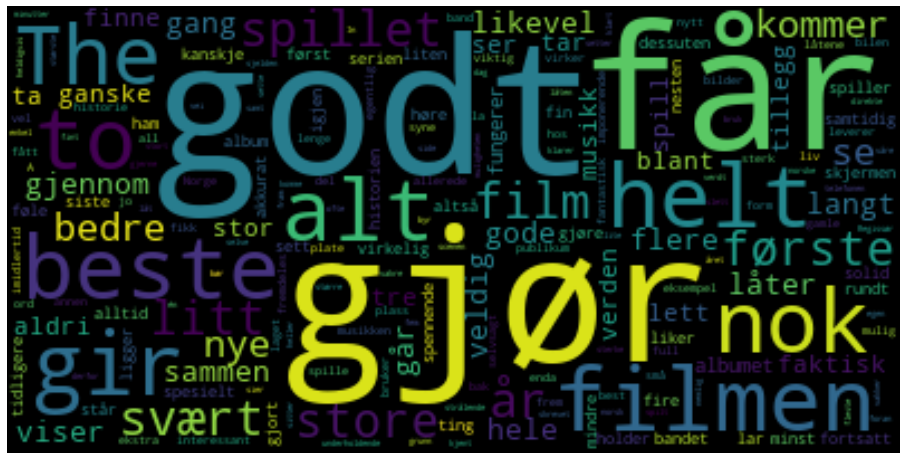

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

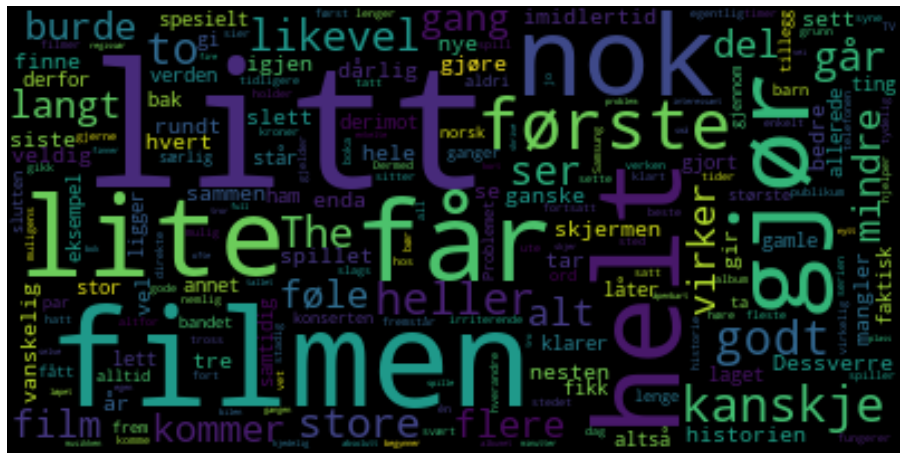

In [14]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

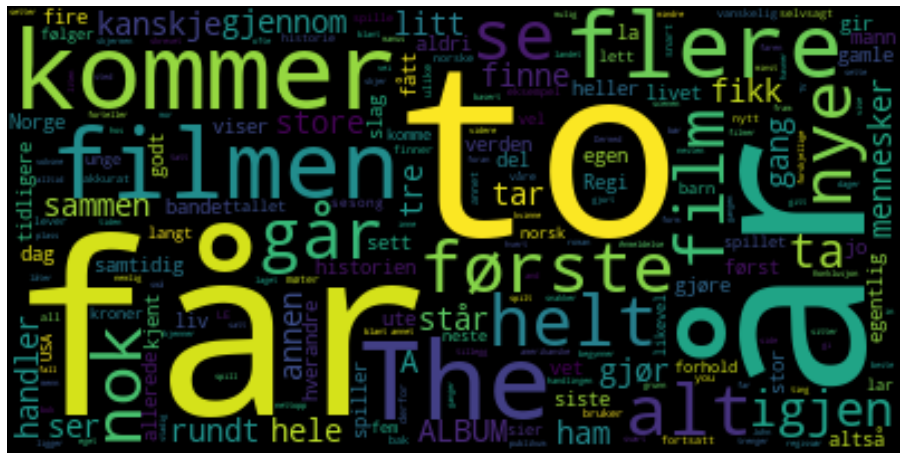

In [15]:
plt.figure(figsize=(16, 9))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()